In [108]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy


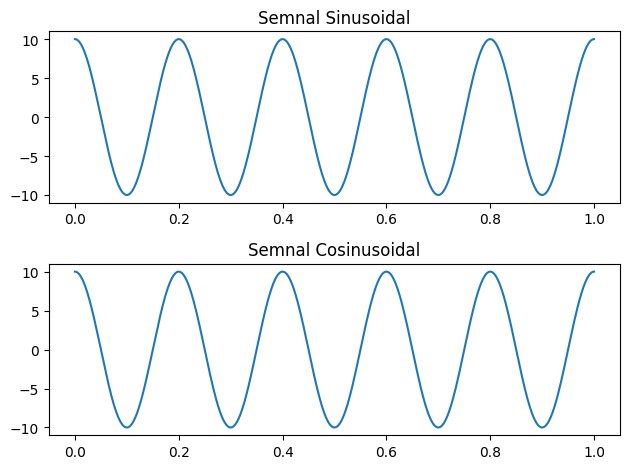

In [109]:
# ex 1
t = np.linspace(0, 1, 1000)  
A = 10 # Amplitudine
f = 5  # Frecvență
phi = np.pi/2  # Fază

# Semnal sinusoidal
sin_signal = A * np.sin(2 * np.pi * f * t + phi)

# Semnal cosinusoidal
# cos(t) = sin(t + π/2), sin(t) = cos(t - π/2)
cos_signal = A * np.cos(2 * np.pi * f * t)

nr_subplots = 2
fig, axs = plt.subplots(nr_subplots)
axs[0].plot(t, sin_signal)
axs[0].set_title('Semnal Sinusoidal')

axs[1].plot(t, cos_signal)
axs[1].set_title('Semnal Cosinusoidal')

# pentru plotarea pe aceeasi figura
# plt.plot(sin_signal)
# plt.plot(cos_signal)

plt.tight_layout()
plt.savefig("grafice/ex1.pdf", format="pdf")
plt.show()

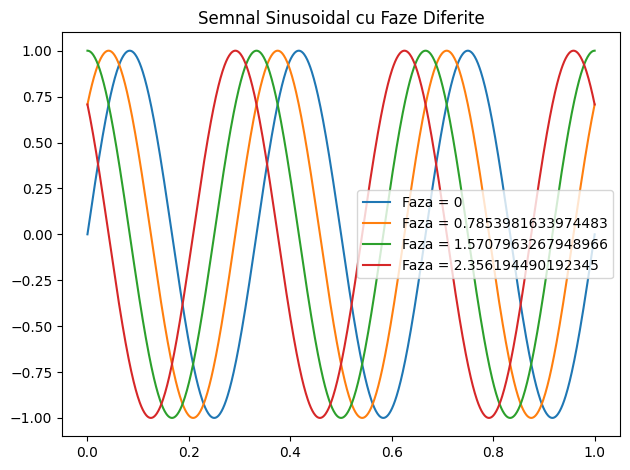

In [110]:
# ex 2
A = 1  # Amplitudine
f = 3  # Frecvență
fs = 1000
t = np.linspace(0, 1, fs)

faze = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Valorile fazei
semnale  = []
plt.figure()
for phi in faze:
    x = A * np.sin(2 * np.pi * f * t + phi)
    semnale.append(x)
    plt.plot(t, x, label=f'Faza = {phi}')

plt.legend()
plt.title('Semnal Sinusoidal cu Faze Diferite')
plt.tight_layout()
plt.savefig("grafice/ex2(a).pdf", format="pdf")
plt.show()


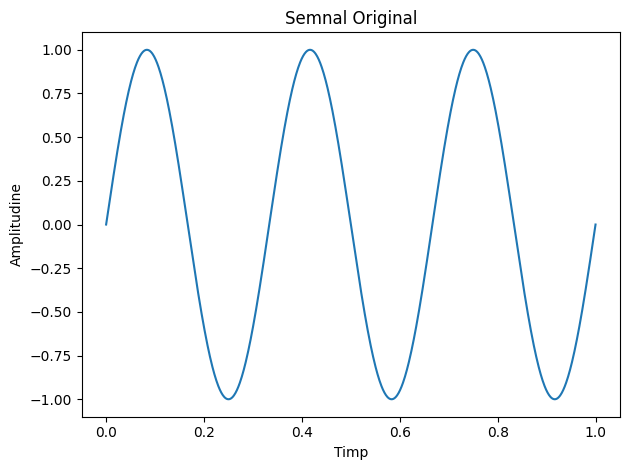

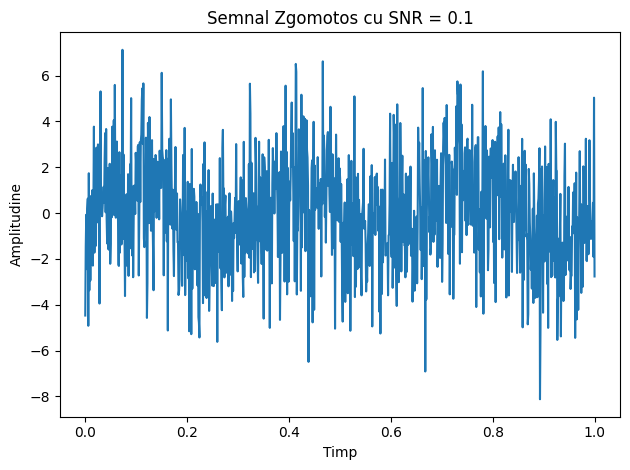

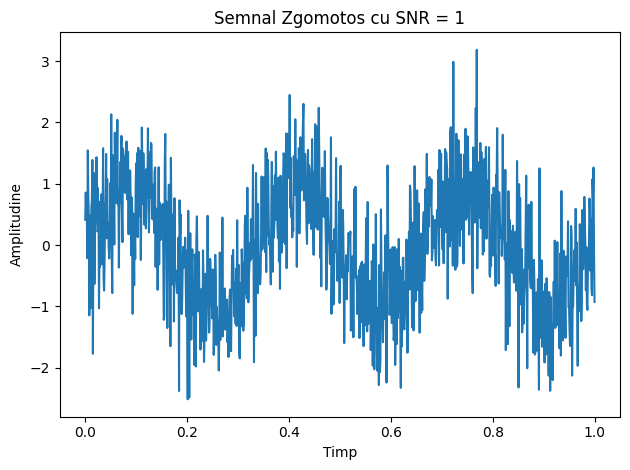

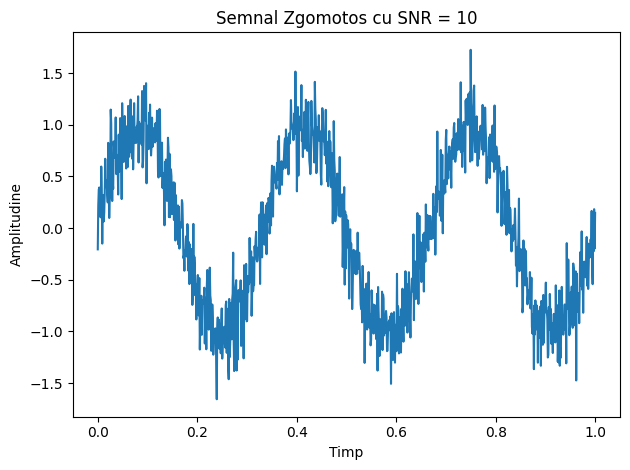

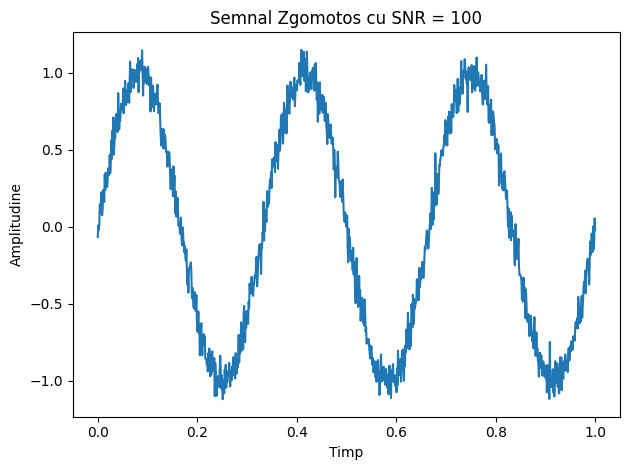

In [111]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_pages = PdfPages('grafice/ex2(b).pdf')

SNRv = [0.1, 1, 10, 100]
x = semnale[0] # Aleg primul semnal pentru a ii adauga zgomot

plt.title(f'Semnal Original')
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.plot(t, x)
plt.tight_layout()
pdf_pages.savefig()
plt.show()

for SNR in SNRv:
    
    # Generare zgomot cu distribuție Gaussiană
    y = np.random.normal(0, 1, fs)
    
    # Calculul lui gamma pentru a obține SNR-ul dorit
    gamma = np.sqrt((np.linalg.norm(x) ** 2) / (SNR * np.linalg.norm(y) ** 2))

    # Adăugarea zgomotului la semnal
    semnal_cu_zgomot = x + gamma * y

    # Afișarea semnalului zgomotos
    plt.plot(t, semnal_cu_zgomot)
    plt.title(f'Semnal Zgomotos cu SNR = {SNR}')
    plt.xlabel('Timp')
    plt.ylabel('Amplitudine')

    plt.tight_layout()
    pdf_pages.savefig()
    plt.show()
    
pdf_pages.close()

In [112]:
# ex 3
# 2 a)
f = 400
fs = 1600
t = np.linspace(0,1,fs)
signal = np.sin(2*np.pi*f*t)

scipy.io.wavfile.write('nume.wav', fs, signal)

sd.play(signal, fs)
sd.wait()



In [113]:
# ex 3
# 2 b)
f = 800
fs = 1000
t = np.linspace(0,3,fs)
signal = np.sin(2*np.pi*f*t)

sd.play(signal, fs)
sd.wait()

In [114]:
# ex 3
# 2 c)
fs = 1000
f = 240
t= np.linspace(0, 1, fs)
signal = 2 * (t * f - np.floor(0.5 + t * f))

sd.play(signal, fs)
sd.wait()

In [115]:
# ex 3
# 2 d)
fs = 1000
f = 300
t= np.linspace(0, 1, fs)
signal = np.sign(np.sin(2 * np.pi *f * t))

sd.play(signal, fs)
sd.wait()

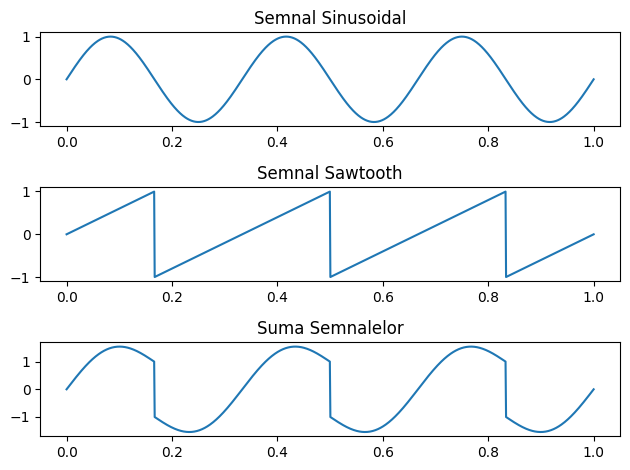

In [116]:
#ex 4
A = 1
f = 3  # Frecvență
fs = 1000
t = np.linspace(0, 1, fs)
x_sine = A * np.sin(2 * np.pi * f * t) 
x_sawtooth = A * 2 * (t * f - np.floor(0.5 + t * f))

x_sum = x_sine + x_sawtooth

nr_subplots = 3
fig, axs = plt.subplots(nr_subplots)
axs[0].plot(t, x_sine)
axs[0].set_title('Semnal Sinusoidal')

axs[1].plot(t, x_sawtooth)
axs[1].set_title('Semnal Sawtooth')

axs[2].plot(t, x_sum)
axs[2].set_title('Suma Semnalelor')

plt.tight_layout()
plt.savefig("grafice/ex4.pdf", format="pdf")
plt.show()


In [117]:
# ex 5

A = 1

fs = 44100  # Frecvența de eșantionare
f1 = 440  # Frecvența primului semnal 
f2 = 660  # Frecvența celui de-al doilea semnal 

t = np.linspace(0, 1, fs)

x1 = A * np.sin(2 * np.pi * f1 * t)
x2 = A * np.sin(2 * np.pi * f2 * t)

x_concatenated = np.concatenate((x1, x2))

# Reda semnalele unul dupa altul
sd.play(x_concatenated, fs)
sd.wait()


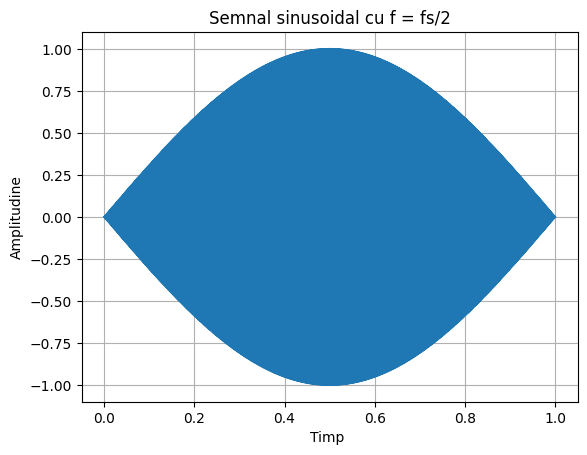

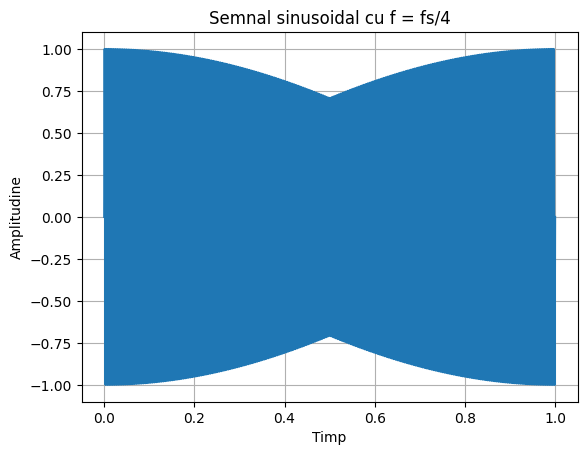

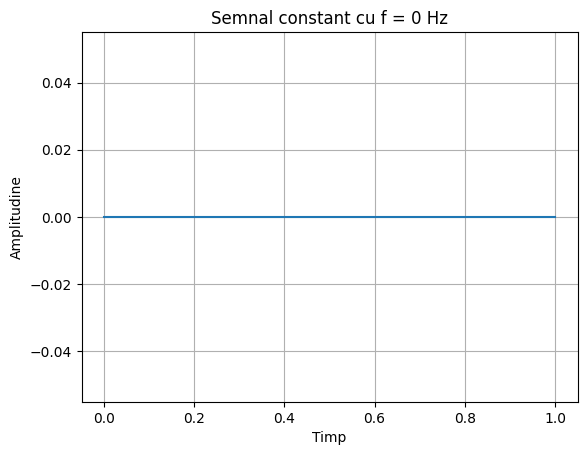

In [118]:
# ex 6
from matplotlib.backends.backend_pdf import PdfPages

pdf_pages = PdfPages('grafice/ex6.pdf')

A = 1
fs = 1000  # Frecventa de esantionare 
t = np.linspace(0, 1, fs)  

# semnalul obtinut nu arata ca cel original deoarece frecventa 
# este mai mica decat frecventa de esantionare

# original_signal = A * np.sin(2 * np.pi * fs * t)  
# plt.plot(t, original_signal)
# plt.xlabel('Timp ')
# plt.ylabel('Amplitudine')
# plt.title('Semnal sinusoidal cu f = fs')
# plt.grid(True)
# pdf_pages.savefig()
# plt.show()


first_signal = A * np.sin(2 * np.pi * (fs//2) * t)  
plt.plot(t, first_signal)
plt.xlabel('Timp ')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cu f = fs/2')
plt.grid(True)
pdf_pages.savefig()
plt.show()

second_signal = A *  np.sin(2 * np.pi * (fs//4)  * t)
plt.plot(t, second_signal)
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cu f = fs/4')
plt.grid(True)
pdf_pages.savefig()
plt.show()

third_signal = np.zeros(len(t))  
plt.plot(t, third_signal)
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.title('Semnal constant cu f = 0 Hz')
plt.grid(True)
pdf_pages.savefig()
plt.show()

pdf_pages.close()

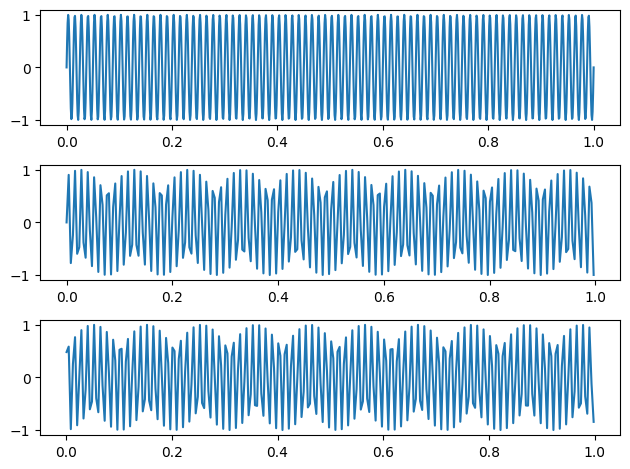

In [119]:
# ex 7
fs = 1000
f = 80

# semnal original
t = np.linspace(0, 1, fs)
signal = np.sin(2 * np.pi * f  * t)

# decinare la 1/4 din freventa initiala
# => pierdere nivel de detaliu
t2 = t[::4]
signal2 = signal[::4] 

# decinarea la 1/4 pornind de la al doilea element din vector 
# adica cel de pe pozitia 1
# => semnalul se deplaseaza spre dreapta
t3 = t[1::4]  
signal3 = signal[1::4]

nr_subplots = 3
fig, axs = plt.subplots(nr_subplots)
axs[0].plot(t, signal)
axs[1].plot(t2,signal2)
axs[2].plot(t3,signal3)
plt.tight_layout()
plt.savefig("grafice/ex7.pdf", format="pdf")
plt.show()


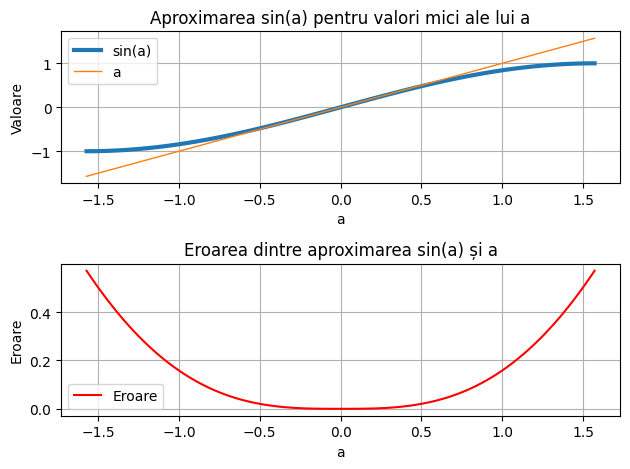

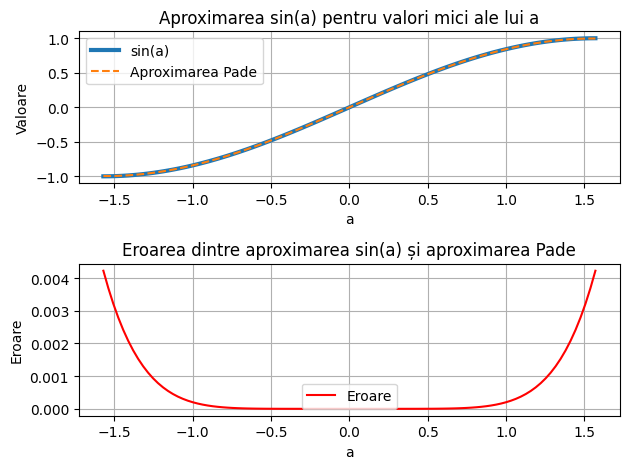

In [120]:
# ex 8
from matplotlib.backends.backend_pdf import PdfPages

pdf_pages = PdfPages('grafice/ex8.pdf')

alpha = np.linspace(-np.pi/2, np.pi/2, 100)
sin_alpha = np.sin(alpha)

error = np.abs(sin_alpha - alpha)

nr_subplots = 2
fig, axs = plt.subplots(nr_subplots)
axs[0].plot(alpha, sin_alpha, label='sin(a)', linewidth=3)
axs[0].plot(alpha, alpha, label='a', linewidth=1)
axs[0].legend()
axs[0].set_xlabel('a')
axs[0].set_ylabel('Valoare')
axs[0].set_title('Aproximarea sin(a) pentru valori mici ale lui a')
axs[0].grid(True)


axs[1].plot(alpha, error, label='Eroare', color='red')
axs[1].legend()
axs[1].set_xlabel('a')
axs[1].set_ylabel('Eroare')
axs[1].set_title('Eroarea dintre aproximarea sin(a) și a')
axs[1].grid(True)


plt.tight_layout()
pdf_pages.savefig()
plt.show()



pade_approximation = (alpha - (7 * alpha**3 / 60)) / (1 + alpha**2 / 20)
error1 = np.abs(sin_alpha - pade_approximation)

nr_subplots = 2
fig, axs = plt.subplots(nr_subplots)
axs[0].plot(alpha, sin_alpha, label='sin(a)', linewidth=3)
axs[0].plot(alpha, pade_approximation, label='Aproximarea Pade', linestyle='--')
axs[0].legend()
axs[0].set_xlabel('a')
axs[0].set_ylabel('Valoare')
axs[0].set_title('Aproximarea sin(a) pentru valori mici ale lui a')
axs[0].grid(True)


axs[1].plot(alpha, error1, label='Eroare', color='red')
axs[1].legend()
axs[1].set_xlabel('a')
axs[1].set_ylabel('Eroare')
axs[1].set_title('Eroarea dintre aproximarea sin(a) și aproximarea Pade')
axs[1].grid(True)

plt.tight_layout()
pdf_pages.savefig()
plt.show()
pdf_pages.close()